# Spam Comment Classification

#### Here we have dataset of comments in youtube that has been classed as Spam (0) or Not Spam (1). Our task is to predict and classify which comment is spam or not spam

In [9]:
import pandas as pd
import numpy as np
import pandas.api.types as ptypes
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.feature_selection import chi2
from sklearn.svm import LinearSVC
from nltk.corpus import stopwords
from bs4 import BeautifulSoup


from sklearn.pipeline import Pipeline

#### Read our data

In [2]:
df = pd.read_excel('comment_spam.xls', index_col=0, as_index=False)  
df_tmp = df.copy()
df_tmp.rename(columns = {'Comment' : 'comment', 'Class' : 'class'}, inplace = True)

In [3]:
df_tmp.head()

,comment,class
No,,
1,this song is racist,0
2,and how many subscribers compared to her over ...,1
3,HI! CHECK OUT OUR AWESOME COVERS! AND SAY WHAT...,1
4,well done shakira,0
5,:D subscribe to me for daily vines,1


In [4]:
df_tmp.isnull().sum()

comment    0
class      0
dtype: int64

### Feature Engineering

In [20]:
def print_plot(index):
    example = df_tmp[df_tmp.index == index][['comment', 'class']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Class:', example[1])
print_plot(5)

subscribe daily vines
Class: 1


#### We will clean all of the titles

In [21]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text
    
df_tmp['comment'] = df_tmp['comment'].apply(clean_text)
print_plot(5)

subscribe daily vines
Class: 1


#### Splitting Train and Test

In [11]:
X, y = df_tmp['proc_comment'], df_tmp['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

#### Check for imbalance dataset

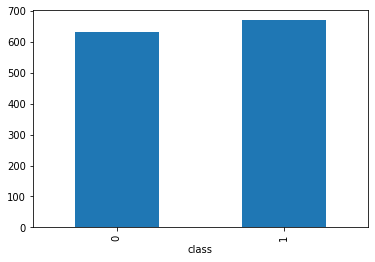

In [75]:
df_tmp.groupby('class').proc_comment.count().plot.bar(ylim=0)
plt.show()

We have a balanced dataset

#### Count Vectorizer and TF-IDF

Using countvectorizer to creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus and that are hence empirically less informative than features that occur in a small fraction of the training corpus.

### Modelling

#### Logistic Regression

In [79]:
pipeline_lr = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('lr', LogisticRegression()),
 ])
pipeline_lr = pipeline_lr.fit(X_train, y_train)

predicted_lr = pipeline_lr.predict(X_test)
print("Train Accuracy:",pipeline_lr.score(X_train, y_train))
print("Test Accuracy:",pipeline_lr.score(X_test, y_test))

Train Accuracy: 0.9721153846153846
Test Accuracy: 0.95


As you can see from above, the scores are very close which indicates that we avoided over-fitting.

In [80]:
confusion_matrix(y_test,predicted_lr)

array([[122,   4],
       [  9, 125]], dtype=int64)

In [81]:
print(classification_report(y_test,predicted_lr))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       126
           1       0.97      0.93      0.95       134

    accuracy                           0.95       260
   macro avg       0.95      0.95      0.95       260
weighted avg       0.95      0.95      0.95       260



#### The accuracy from Logistic Regression is 95%

#### Random Forest Classifier

In [82]:
pipeline_rfc = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('rfc', RandomForestClassifier()),
 ])
pipeline_rfc = pipeline_rfc.fit(X_train, y_train)

predicted_rfc = pipeline_rfc.predict(X_test)
print("Train Accuracy:",pipeline_rfc.score(X_train, y_train))
print("Test Accuracy:",pipeline_rfc.score(X_test, y_test))

Train Accuracy: 0.9990384615384615
Test Accuracy: 0.9653846153846154


As you can see from above, the scores are very close which indicates that we avoided over-fitting.

In [83]:
confusion_matrix(y_test,predicted_rfc)

array([[124,   2],
       [  7, 127]], dtype=int64)

In [84]:
print(classification_report(y_test,predicted_rfc))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       126
           1       0.98      0.95      0.97       134

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260



#### The accuracy from Random Forest Classifier is 96.5%

#### Decision Tree

In [85]:
pipeline_dtc = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('dtc', DecisionTreeClassifier()),
 ])
pipeline_dtc = pipeline_dtc.fit(X_train, y_train)

predicted_dtc = pipeline_dtc.predict(X_test)
print("Train Accuracy:",pipeline_dtc.score(X_train, y_train))
print("Test Accuracy:",pipeline_dtc.score(X_test, y_test))

Train Accuracy: 0.9990384615384615
Test Accuracy: 0.95


As you can see from above, the scores are very close which indicates that we avoided over-fitting.

In [86]:
confusion_matrix(y_test,predicted_dtc)

array([[122,   4],
       [  9, 125]], dtype=int64)

In [87]:
print(classification_report(y_test,predicted_dtc))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       126
           1       0.97      0.93      0.95       134

    accuracy                           0.95       260
   macro avg       0.95      0.95      0.95       260
weighted avg       0.95      0.95      0.95       260



#### The accuracy from Decision Tree is 95%

#### Naive Bayes

In [88]:
pipeline_nb = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('nb', MultinomialNB()),
 ])
pipeline_nb = pipeline_nb.fit(X_train, y_train)

predicted_nb = pipeline_nb.predict(X_test)
print("Train Accuracy:",pipeline_nb.score(X_train, y_train))
print("Test Accuracy:",pipeline_nb.score(X_test, y_test))

Train Accuracy: 0.9682692307692308
Test Accuracy: 0.9346153846153846


As you can see from above, the scores are very close which indicates that we avoided over-fitting.

In [89]:
confusion_matrix(y_test,predicted_nb)

array([[114,  12],
       [  5, 129]], dtype=int64)

In [90]:
print(classification_report(y_test,predicted_nb))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93       126
           1       0.91      0.96      0.94       134

    accuracy                           0.93       260
   macro avg       0.94      0.93      0.93       260
weighted avg       0.94      0.93      0.93       260



#### The accuracy from Naive Bayes is 93.46%

#### K-Nearest Neighbors

In [91]:
pipeline_knn = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('knn', KNeighborsClassifier()),
 ])
pipeline_knn = pipeline_knn.fit(X_train, y_train)

predicted_knn = pipeline_knn.predict(X_test)
print("Train Accuracy:",pipeline_knn.score(X_train, y_train))
print("Test Accuracy:",pipeline_knn.score(X_test, y_test))

Train Accuracy: 0.6884615384615385
Test Accuracy: 0.6923076923076923


As you can see from above, the scores are very close which indicates that we avoided over-fitting.

In [92]:
confusion_matrix(y_test,predicted_knn)

array([[126,   0],
       [ 80,  54]], dtype=int64)

In [93]:
print(classification_report(y_test,predicted_knn))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76       126
           1       1.00      0.40      0.57       134

    accuracy                           0.69       260
   macro avg       0.81      0.70      0.67       260
weighted avg       0.81      0.69      0.66       260



#### The accuracy from K-Nearest Neighbors is 69.2%

#### Random Forest Classifier have the best Accuracy (96.5%), so we will be using that

#### Hyperparameter tuning using GridSearchCV

In [103]:
rfc_param_grid = {
    "vect__ngram_range": [(1, 1),(1, 2)],
    "tfidf__use_idf": (True, False),
    "rfc__max_depth": (list(range(5,100,5)), None),
    "rfc__max_features": ['auto', 'sqrt','log2', None],
    "rfc__min_samples_leaf": (list(range(1,10,1))),
    "rfc__min_samples_split": (list(range(1,10,1))),
    "rfc__n_estimators": (list(range(50,300,10)))
}

In [104]:
search = RandomizedSearchCV(pipeline_rfc, param_distributions=rfc_param_grid, verbose=8)
search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] vect__ngram_range=(1, 2), tfidf__use_idf=True, rfc__n_estimators=120, rfc__min_samples_split=9, rfc__min_samples_leaf=9, rfc__max_features=auto, rfc__max_depth=None 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  vect__ngram_range=(1, 2), tfidf__use_idf=True, rfc__n_estimators=120, rfc__min_samples_split=9, rfc__min_samples_leaf=9, rfc__max_features=auto, rfc__max_depth=None, score=0.856, total=   0.2s
[CV] vect__ngram_range=(1, 2), tfidf__use_idf=True, rfc__n_estimators=120, rfc__min_samples_split=9, rfc__min_samples_leaf=9, rfc__max_features=auto, rfc__max_depth=None 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  vect__ngram_range=(1, 2), tfidf__use_idf=True, rfc__n_estimators=120, rfc__min_samples_split=9, rfc__min_samples_leaf=9, rfc__max_features=auto, rfc__max_depth=None, score=0.865, total=   0.2s
[CV] vect__ngram_range=(1, 2), tfidf__use_idf=True, rfc__n_estimators=120, rfc__min_samples_split=9, rfc__min_samples_leaf=9, rfc__max_features=auto, rfc__max_depth=None 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  vect__ngram_range=(1, 2), tfidf__use_idf=True, rfc__n_estimators=120, rfc__min_samples_split=9, rfc__min_samples_leaf=9, rfc__max_features=auto, rfc__max_depth=None, score=0.928, total=   0.2s
[CV] vect__ngram_range=(1, 2), tfidf__use_idf=True, rfc__n_estimators=120, rfc__min_samples_split=9, rfc__min_samples_leaf=9, rfc__max_features=auto, rfc__max_depth=None 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV]  vect__ngram_range=(1, 2), tfidf__use_idf=True, rfc__n_estimators=120, rfc__min_samples_split=9, rfc__min_samples_leaf=9, rfc__max_features=auto, rfc__max_depth=None, score=0.861, total=   0.2s
[CV] vect__ngram_range=(1, 2), tfidf__use_idf=True, rfc__n_estimators=120, rfc__min_samples_split=9, rfc__min_samples_leaf=9, rfc__max_features=auto, rfc__max_depth=None 
[CV]  vect__ngram_range=(1, 2), tfidf__use_idf=True, rfc__n_estimators=120, rfc__min_samples_split=9, rfc__min_samples_leaf=9, rfc__max_features=auto, rfc__max_depth=None, score=0.822, total=   0.2s

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s



[CV] vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=220, rfc__min_samples_split=1, rfc__min_samples_leaf=1, rfc__max_features=log2, rfc__max_depth=None 
[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=220, rfc__min_samples_split=1, rfc__min_samples_leaf=1, rfc__max_features=log2, rfc__max_depth=None, score=nan, total=   0.1s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=220, rfc__min_samples_split=1, rfc__min_samples_leaf=1, rfc__max_features=log2, rfc__max_depth=None 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.0s remaining:    0.0s
C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\joblib\parallel.py", line 1041, in __call__
 

[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=220, rfc__min_samples_split=1, rfc__min_samples_leaf=1, rfc__max_features=log2, rfc__max_depth=None, score=nan, total=   0.1s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=220, rfc__min_samples_split=1, rfc__min_samples_leaf=1, rfc__max_features=log2, rfc__max_depth=None 
[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=220, rfc__min_samples_split=1, rfc__min_samples_leaf=1, rfc__max_features=log2, rfc__max_depth=None, score=nan, total=   0.1s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=220, rfc__min_samples_split=1, rfc__min_samples_leaf=1, rfc__max_features=log2, rfc__max_depth=None 


C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\audia\AppData\Roaming\

[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=220, rfc__min_samples_split=1, rfc__min_samples_leaf=1, rfc__max_features=log2, rfc__max_depth=None, score=nan, total=   0.1s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=220, rfc__min_samples_split=1, rfc__min_samples_leaf=1, rfc__max_features=log2, rfc__max_depth=None 
[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=220, rfc__min_samples_split=1, rfc__min_samples_leaf=1, rfc__max_features=log2, rfc__max_depth=None, score=nan, total=   0.1s
[CV] vect__ngram_range=(1, 2), tfidf__use_idf=True, rfc__n_estimators=280, rfc__min_samples_split=8, rfc__min_samples_leaf=1, rfc__max_features=None, rfc__max_depth=None 
[CV]  vect__ngram_range=(1, 2), tfidf__use_idf=True, rfc__n_estimators=280, rfc__min_samples_split=8, rfc__min_samples_leaf=1, rfc__max_features=None, rfc__max_depth=None, score=0.923, total=   7.5s
[CV] vect__ngram_range=(1, 2), tfidf__use_idf=True, rfc__n_estima

C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\audia\AppData\Roaming\

[CV]  vect__ngram_range=(1, 2), tfidf__use_idf=True, rfc__n_estimators=100, rfc__min_samples_split=7, rfc__min_samples_leaf=5, rfc__max_features=sqrt, rfc__max_depth=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95], score=nan, total=   0.1s
[CV] vect__ngram_range=(1, 2), tfidf__use_idf=True, rfc__n_estimators=100, rfc__min_samples_split=7, rfc__min_samples_leaf=5, rfc__max_features=sqrt, rfc__max_depth=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95] 
[CV]  vect__ngram_range=(1, 2), tfidf__use_idf=True, rfc__n_estimators=100, rfc__min_samples_split=7, rfc__min_samples_leaf=5, rfc__max_features=sqrt, rfc__max_depth=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95], score=nan, total=   0.1s
[CV] vect__ngram_range=(1, 2), tfidf__use_idf=True, rfc__n_estimators=100, rfc__min_samples_split=7, rfc__min_samples_leaf=5, rfc__max_features=sqrt, rfc__max_depth=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 7

C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\audia\AppData\Roaming\

[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=False, rfc__n_estimators=290, rfc__min_samples_split=9, rfc__min_samples_leaf=8, rfc__max_features=sqrt, rfc__max_depth=None, score=0.923, total=   0.5s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=False, rfc__n_estimators=290, rfc__min_samples_split=9, rfc__min_samples_leaf=8, rfc__max_features=sqrt, rfc__max_depth=None 
[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=False, rfc__n_estimators=290, rfc__min_samples_split=9, rfc__min_samples_leaf=8, rfc__max_features=sqrt, rfc__max_depth=None, score=0.894, total=   0.4s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=False, rfc__n_estimators=290, rfc__min_samples_split=9, rfc__min_samples_leaf=8, rfc__max_features=sqrt, rfc__max_depth=None 
[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=False, rfc__n_estimators=290, rfc__min_samples_split=9, rfc__min_samples_leaf=8, rfc__max_features=sqrt, rfc__max_depth=None, score=0.913, total=   0.5s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=False, rfc

C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\audia\AppData\Roaming\

[CV]  vect__ngram_range=(1, 2), tfidf__use_idf=False, rfc__n_estimators=270, rfc__min_samples_split=1, rfc__min_samples_leaf=8, rfc__max_features=None, rfc__max_depth=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95], score=nan, total=   0.2s
[CV] vect__ngram_range=(1, 2), tfidf__use_idf=False, rfc__n_estimators=270, rfc__min_samples_split=1, rfc__min_samples_leaf=8, rfc__max_features=None, rfc__max_depth=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95] 
[CV]  vect__ngram_range=(1, 2), tfidf__use_idf=False, rfc__n_estimators=270, rfc__min_samples_split=1, rfc__min_samples_leaf=8, rfc__max_features=None, rfc__max_depth=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95], score=nan, total=   0.2s
[CV] vect__ngram_range=(1, 2), tfidf__use_idf=False, rfc__n_estimators=270, rfc__min_samples_split=1, rfc__min_samples_leaf=8, rfc__max_features=None, rfc__max_depth=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 7

C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\audia\AppData\Roaming\

[CV]  vect__ngram_range=(1, 2), tfidf__use_idf=False, rfc__n_estimators=270, rfc__min_samples_split=1, rfc__min_samples_leaf=8, rfc__max_features=None, rfc__max_depth=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95], score=nan, total=   0.1s
[CV] vect__ngram_range=(1, 2), tfidf__use_idf=False, rfc__n_estimators=270, rfc__min_samples_split=1, rfc__min_samples_leaf=8, rfc__max_features=None, rfc__max_depth=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95] 
[CV]  vect__ngram_range=(1, 2), tfidf__use_idf=False, rfc__n_estimators=270, rfc__min_samples_split=1, rfc__min_samples_leaf=8, rfc__max_features=None, rfc__max_depth=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95], score=nan, total=   0.2s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=280, rfc__min_samples_split=1, rfc__min_samples_leaf=9, rfc__max_features=log2, rfc__max_depth=None 


C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\audia\AppData\Roaming\

[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=280, rfc__min_samples_split=1, rfc__min_samples_leaf=9, rfc__max_features=log2, rfc__max_depth=None, score=nan, total=   0.1s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=280, rfc__min_samples_split=1, rfc__min_samples_leaf=9, rfc__max_features=log2, rfc__max_depth=None 
[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=280, rfc__min_samples_split=1, rfc__min_samples_leaf=9, rfc__max_features=log2, rfc__max_depth=None, score=nan, total=   0.1s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=280, rfc__min_samples_split=1, rfc__min_samples_leaf=9, rfc__max_features=log2, rfc__max_depth=None 


C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\audia\AppData\Roaming\

[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=280, rfc__min_samples_split=1, rfc__min_samples_leaf=9, rfc__max_features=log2, rfc__max_depth=None, score=nan, total=   0.1s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=280, rfc__min_samples_split=1, rfc__min_samples_leaf=9, rfc__max_features=log2, rfc__max_depth=None 
[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=280, rfc__min_samples_split=1, rfc__min_samples_leaf=9, rfc__max_features=log2, rfc__max_depth=None, score=nan, total=   0.1s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=280, rfc__min_samples_split=1, rfc__min_samples_leaf=9, rfc__max_features=log2, rfc__max_depth=None 


C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\audia\AppData\Roaming\

[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=280, rfc__min_samples_split=1, rfc__min_samples_leaf=9, rfc__max_features=log2, rfc__max_depth=None, score=nan, total=   0.1s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=False, rfc__n_estimators=60, rfc__min_samples_split=8, rfc__min_samples_leaf=8, rfc__max_features=sqrt, rfc__max_depth=None 
[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=False, rfc__n_estimators=60, rfc__min_samples_split=8, rfc__min_samples_leaf=8, rfc__max_features=sqrt, rfc__max_depth=None, score=0.913, total=   0.1s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=False, rfc__n_estimators=60, rfc__min_samples_split=8, rfc__min_samples_leaf=8, rfc__max_features=sqrt, rfc__max_depth=None 
[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=False, rfc__n_estimators=60, rfc__min_samples_split=8, rfc__min_samples_leaf=8, rfc__max_features=sqrt, rfc__max_depth=None, score=0.904, total=   0.1s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=False, rfc__n_est

C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\audia\AppData\Roaming\

[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=80, rfc__min_samples_split=2, rfc__min_samples_leaf=1, rfc__max_features=auto, rfc__max_depth=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95], score=nan, total=   0.1s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=80, rfc__min_samples_split=2, rfc__min_samples_leaf=1, rfc__max_features=auto, rfc__max_depth=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95] 
[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=80, rfc__min_samples_split=2, rfc__min_samples_leaf=1, rfc__max_features=auto, rfc__max_depth=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95], score=nan, total=   0.1s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=80, rfc__min_samples_split=2, rfc__min_samples_leaf=1, rfc__max_features=auto, rfc__max_depth=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 8

C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\pipeline.py", line 335, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\audia\AppData\Roaming\Python\Python38\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\audia\AppData\Roaming\

[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=True, rfc__n_estimators=80, rfc__min_samples_split=2, rfc__min_samples_leaf=1, rfc__max_features=auto, rfc__max_depth=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95], score=nan, total=   0.1s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=False, rfc__n_estimators=100, rfc__min_samples_split=3, rfc__min_samples_leaf=1, rfc__max_features=log2, rfc__max_depth=None 
[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=False, rfc__n_estimators=100, rfc__min_samples_split=3, rfc__min_samples_leaf=1, rfc__max_features=log2, rfc__max_depth=None, score=0.933, total=   0.3s
[CV] vect__ngram_range=(1, 1), tfidf__use_idf=False, rfc__n_estimators=100, rfc__min_samples_split=3, rfc__min_samples_leaf=1, rfc__max_features=log2, rfc__max_depth=None 
[CV]  vect__ngram_range=(1, 1), tfidf__use_idf=False, rfc__n_estimators=100, rfc__min_samples_split=3, rfc__min_samples_leaf=1, rfc__max_features=log2, rfc__max_depth=None, score=0.942, tot

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   44.4s finished


RandomizedSearchCV(estimator=Pipeline(steps=[('vect', CountVectorizer()),
                                             ('tfidf', TfidfTransformer()),
                                             ('rfc',
                                              RandomForestClassifier())]),
                   param_distributions={'rfc__max_depth': ([5, 10, 15, 20, 25,
                                                            30, 35, 40, 45, 50,
                                                            55, 60, 65, 70, 75,
                                                            80, 85, 90, 95],
                                                           None),
                                        'rfc__max_features': ['auto', 'sqrt',
                                                              'log2', None],
                                        'rfc__min_samples_leaf': [1, 2, 3, 4, 5,
                                                                  6, 7, 8, 9],
                         

In [105]:
search.best_params_

{'vect__ngram_range': (1, 1),
 'tfidf__use_idf': False,
 'rfc__n_estimators': 100,
 'rfc__min_samples_split': 3,
 'rfc__min_samples_leaf': 1,
 'rfc__max_features': 'log2',
 'rfc__max_depth': None}

In [106]:
y_pred = search.predict(X_test)
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       126
           1       0.99      0.96      0.97       134

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260



In [107]:
print("Train Accuracy:",search.score(X_train, y_train))
print("Test Accuracy:",search.score(X_test, y_test))

Train Accuracy: 0.9990384615384615
Test Accuracy: 0.9730769230769231


#### After hyperparameter tuning, we have increased our test accuracy result from 96.5% to 97.3%

In [108]:
confusion_matrix(y_test,y_pred)

array([[125,   1],
       [  6, 128]], dtype=int64)

Text(0.5, 1.0, 'ROC curve for our Logistic Regression Model')

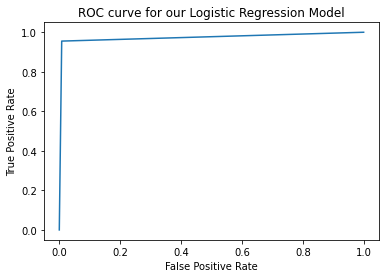

In [109]:
fpr, tpr, _ = metrics.roc_curve(y_test.values, y_pred)

plt.plot(fpr,tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC curve for our Logistic Regression Model")

### The result are great for predicting spam comments!

#### Notes: We used ROC-AUC curve because the data is relatively balanced and this is a one-class problem

### NLTK (Natural Language Toolkit)

stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form. E.g. A stemming algorithm reduces the words “fishing”, “fished”, and “fisher” to the root word, “fish”.
We need NLTK to do this. NLTK comes with various stemmers which can help reducing the words to their root form.

In [156]:
import nltk
from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english", ignore_stopwords=True)

class StemmedCountVectorizer(CountVectorizer):
    def build_analyzer(self):
        analyzer = super(StemmedCountVectorizer, self).build_analyzer()
        return lambda doc: ([stemmer.stem(w) for w in analyzer(doc)])
stemmed_count_vect = StemmedCountVectorizer()
text_mnb_stemmed = Pipeline([('vect', stemmed_count_vect),
                          ('tfidf', TfidfTransformer()),
                          ('mnb', MultinomialNB(fit_prior=False)),
                             ])
text_mnb_stemmed = text_mnb_stemmed.fit(X_train, y_train)
predicted_mnb_stemmed = text_mnb_stemmed.predict(X_test)
np.mean(predicted_mnb_stemmed == y_test)

0.9384615384615385

#### NLTK and stemming does not increase our previous accuracy

## Deep Learning with Keras

In [22]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

train_size = int(len(df) * .8)
train_title = df_tmp['comment'][:train_size]
train_cat = df_tmp['class'][:train_size]

test_title = df_tmp['comment'][train_size:]
test_cat = df_tmp['class'][train_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_title) # only fit on train

X_train = tokenize.texts_to_matrix(train_title)
X_test = tokenize.texts_to_matrix(test_title)

encoder = LabelEncoder()
encoder.fit(train_cat)
y_train = encoder.transform(train_cat)
y_test = encoder.transform(test_cat)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

batch_size = 32
epochs = 20

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2)

Epoch 1/20
26/26 [==============================] - 0s 15ms/step - loss: 0.5678 - accuracy: 0.6358 - val_loss: 0.6110 - val_accuracy: 0.5192
Epoch 2/20
26/26 [==============================] - 0s 6ms/step - loss: 0.3589 - accuracy: 0.9050 - val_loss: 0.3904 - val_accuracy: 0.9038
Epoch 3/20
26/26 [==============================] - 0s 5ms/step - loss: 0.2097 - accuracy: 0.9615 - val_loss: 0.2691 - val_accuracy: 0.9375
Epoch 4/20
26/26 [==============================] - 0s 5ms/step - loss: 0.1315 - accuracy: 0.9712 - val_loss: 0.2054 - val_accuracy: 0.9567
Epoch 5/20
26/26 [==============================] - 0s 5ms/step - loss: 0.0846 - accuracy: 0.9820 - val_loss: 0.1697 - val_accuracy: 0.9519
Epoch 6/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0623 - accuracy: 0.9856 - val_loss: 0.1505 - val_accuracy: 0.9615
Epoch 7/20
26/26 [==============================] - 0s 6ms/step - loss: 0.0464 - accuracy: 0.9904 - val_loss: 0.1397 - val_accuracy: 0.9663
Epoch 8/20
26/26 [=

In [24]:
score = model.evaluate(X_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

9/9 [==============================] - 0s 2ms/step - loss: 0.2004 - accuracy: 0.9385
Test accuracy: 0.9384615421295166


### Deep Learning with Keras doesn't improve on our accuracy we get from Random Forest Classifier

###### By Audi Armadhani for Bagidata